# Przygotowanie tekstu

W tej laborce będziemy przygotowywać tekst tweetów do analizy sentymentu. Docelowo podana zostanie gotowa funkcja do przygotowania tweetów, ale dobrze jest wiedzieć co dzieje się w takiej funkcji. W tej laborce nauczymy się korzystać z pakietu NLTK (Natural Language Toolkit), aby przygotować zautomatyzowany pipeline do przygotowania zbiór danych tekstowych z Twittera.


# Biblioteki

Kurs w pierwszych dwóch tygodniach przewiduje pracę na danych tekstowych z Twittera. Będziemy używać biblioteki NLTK dedykowanej do przetwarzania języka naturalnego. Biblioteka ta posiada moduły do zbierania, przetwarzania i obrabiania danych z Twittera. W trakcie kursu będziemy poznawać kolejne moduły. Do tego ćwiczenia skorzystamy ze zbioru danych Twitterowych przygotowanego w bibliotece NLTK. Jest to ręcznie oznaczony zbiór tweetów, który służy do szybkiego wyznaczania startowych możliwości naszego modelu (baseline). Zaimportujmy potrzebne biblioteki.


In [3]:
import nltk                                # Biblioteka NLP do Pythona
from nltk.corpus import twitter_samples    # przykładowy zbiór tweetów z NLTK
import matplotlib.pyplot as plt            # Biblioteka do wizualizacji wyników
import random                              # generator liczb pseudolosowych

# O zbiorze danych z Twittera
Zbiór tweetów z NLTK jest podzielony na pozytywne i negatywne tweety. Zawiera on dokładnie 5000 tweetów pozytywnych i 5000 tweetów negatywnych. Dokładne dopasowanie pomiędzy tymi klasami nie jest przypadkowe. Intencją jest posiadanie zrównoważonego zbioru danych. Nie odzwierciedla to rzeczywistych rozkładów klas pozytywnych i negatywnych w strumieniach Twittera na żywo. To tylko dlatego, że zrównoważone zestawy danych upraszczają projektowanie większości metod obliczeniowych, które są wymagane do analizy sentymentu. Jednakże, lepiej jest mieć świadomość, że ten bilans klas jest sztuczny.


In [4]:
#pobieramy zbiór danych z biblioteki nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ajankowski\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

Aby załadować pozytywne i negatywne tweety możemy użyć metody `strings()`:

In [5]:
#wybieramy pozytywne i negatywne tweety ze zbioru danych
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [9]:
#sprawdzamy ilość tweetów w obu zbiorach oraz strukturę w jakich zapisane są dane
print('Ilość pozytywnych tweetów: ', len(all_positive_tweets))
print('Ilość negatywnych tweetów: ', len(all_negative_tweets))

print('\nStruktura pozytywnych tweetów to: ', type(all_positive_tweets))
print('Struktura pojedynczego tweeta to: ', type(all_positive_tweets[0]))

Ilość pozytywnych tweetów:  5000
Ilość negatywnych tweetów:  5000

Struktura pozytywnych tweetów to:  <class 'list'>
Struktura pojedynczego tweeta to:  <class 'str'>


Jak widzimy tweety są zapisane w listach, a każdy pojedynczy tweet to zmienna typu string.

Przedstawmy powyższe dane na wizualizacji wykorzystując bibliotekę matplotlib i wykres kołowy

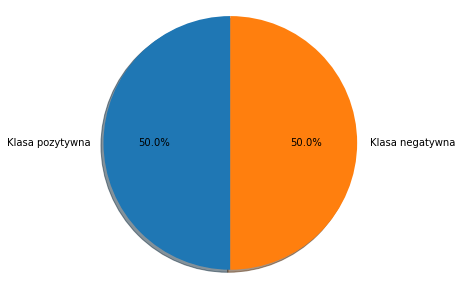

In [11]:
# deklarujemy rozmiar wykresu
fig = plt.figure(figsize=(5, 5))

# oznaczamy klasy
labels = 'Klasa pozytywna', 'Klasa negatywna'

# rozmiary poszczególnych klas
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Wybieramy wykres kołowy, części koła będą uszeregowane przeciwnie do ruchu wskazówek zegara:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# opcja 'equal' zapewnia, że wyrysujemy pełne koło
plt.axis('equal')  

# wyświetlenie wykresu
plt.show()

# Pierwsze spojrzenie na dane

Na początek, możemy wydrukować kilka tweetów ze zbioru, aby zobaczyć jak wyglądają. Zrozumienie danych jest odpowiedzialne za 80% sukcesu lub porażki w projektach związanych z nauką o danych. Możemy wykorzystać ten czas na obserwację aspektów, które chcielibyśmy rozważyć podczas wstępnego przetwarzania naszych danych.

Poniżej, wydrukujesz jeden losowo pozytywny i jeden losowo negatywny tweet. Dodaliśmy kolorowy znak na początku ciągu znaków, aby jeszcze bardziej rozróżnić te dwa elementy. (Ostrzeżenie: Jest on zaczerpnięty z publicznego zbioru danych prawdziwych tweetów i niewielka ilość tweetów zawiera treści wulgarne).

In [13]:
# tweet pozytywny na zielono
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# tweet negatywny na czerwono
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

Going Home :)
@larryequality this :( http://t.co/6rEe3BrXe6


Od razu widać, że w wielu tweetach pojawiają się emoty i linki URL